In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data


In [2]:
loan = pd.read_csv("C:\\Users\\musta\\Downloads\\loan by banking company\\train_loan\\train.csv")
loan

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,C10006,A,COM0000010,A,1.0,4900.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,10,0
69709,APPV80989824738,Female,27/01/71,30/09/16,C10116,C,COM0045789,A,4.0,7190.1,...,N,S122,G,1450.0,NaN,NaN,NaN,NaN,7,0
69710,APPW50697209842,Female,01/02/92,30/09/16,C10022,B,COM0013284,C,4.0,1600.0,...,Y,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0
69711,APPY50870035036,Male,27/06/78,30/09/16,C10002,A,COM0000098,C,3.0,9893.0,...,Y,S122,G,1366.0,80000.0,5.0,NaN,NaN,10,0


## Exploring The Data

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   City_Code                            68899 non-null  object 
 5   City_Category                        68899 non-null  object 
 6   Employer_Code                        65695 non-null  object 
 7   Employer_Category1                   65695 non-null  object 
 8   Employer_Category2                   65415 non-null  float64
 9   Monthly_Income                       69713 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  60322 non-null  object 
 11  Primary_Bank_Type           

In [4]:
loan.isnull().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved                                   0
dtype: int

In [5]:
#finding the percentage of null values in comparison to the total number of values
round(((loan.isnull().sum())/(loan.count()))*100)


ID                                       0.0
Gender                                   0.0
DOB                                      0.0
Lead_Creation_Date                       0.0
City_Code                                1.0
City_Category                            1.0
Employer_Code                            6.0
Employer_Category1                       6.0
Employer_Category2                       7.0
Monthly_Income                           0.0
Customer_Existing_Primary_Bank_Code     16.0
Primary_Bank_Type                       16.0
Contacted                                0.0
Source                                   0.0
Source_Category                          0.0
Existing_EMI                             0.0
Loan_Amount                             66.0
Loan_Period                             66.0
Interest_Rate                          213.0
EMI                                    213.0
Var1                                     0.0
Approved                                 0.0
dtype: flo

In [6]:
#Interest rate have a very high amount of null values and also EMI
loan[["Interest_Rate","EMI"]]


,Interest_Rate,EMI
0,NaN,NaN
1,13.25,953.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
69708,NaN,NaN
69709,NaN,NaN
69710,35.50,943.0
69711,NaN,NaN


In [7]:
loan.Interest_Rate.isnull().sum()

47437

In [8]:
loan.EMI.isnull().sum()

47437

## Cleaning the Data

In [9]:
#dropping all the columns which are insignificant and doesn't contain necessary information
loan.drop(["Gender","DOB","City_Category","Employer_Category2","Employer_Code","Primary_Bank_Type","Source","Source_Category","Var1"],inplace = True,axis = 1)

In [10]:
#dropping all the those rows which have null values and are insignificant in number
loan.dropna(subset = ["City_Code","Employer_Category1","Customer_Existing_Primary_Bank_Code","Existing_EMI"],inplace = True)

In [11]:
#filling the missing values in INTEREST RATE with average of prevailing interest rates 
loan.Interest_Rate.fillna(value = round(loan.Interest_Rate.sum()/loan.Interest_Rate.count()),inplace = True)

In [12]:
##filling missing values EMI column with actual EMI amount with the help of Loan Amount , Loan Period and interest rate.
loan.EMI.fillna(value = round((loan.Loan_Amount * loan.Interest_Rate *(1+loan.Interest_Rate)**(loan.Loan_Period*12))/((1+loan.Interest_Rate)**(loan.Loan_Period*12)-1)),inplace = True)

<class 'pandas.core.series.Series'>
Int64Index: 59729 entries, 0 to 69711
Series name: Loan_Amount
Non-Null Count  Dtype  
--------------  -----  
39253 non-null  float64
dtypes: float64(1)
memory usage: 933.3 KB


<Axes: ylabel='Loan_Amount'>

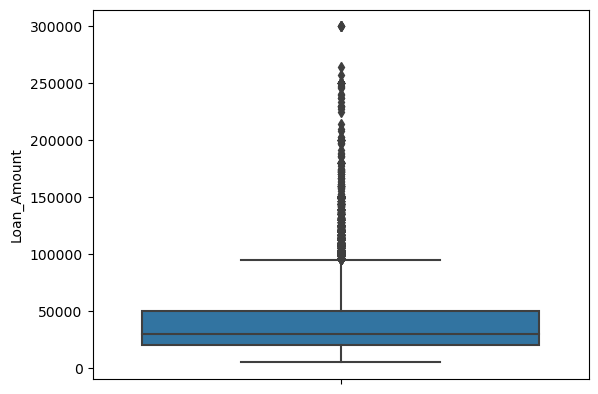

In [13]:
#analysisng if missing_values in loan Amount column can be filled with median values using boxplot
loan.Loan_Amount.info()
sns.boxplot(data = loan,y = "Loan_Amount")

In [14]:
#since a lot of values are outliers , it will be sensible to drop the missing values instead of using median to fill them 
loan.dropna(subset = ["Loan_Amount","Loan_Period","EMI"],inplace = True)

##  Data Visualisation and Analysis

####  1. From the below scatterplot ,  we can safely say that as the amount of loan increases , the tenure of its repayment also increases. The amount of loan is directly proportional to the period of loan . 

#### 2. We can also derive the fact that , the number of loans given by the bank are more inclined towards shorter period to primarily meet the requirement for working capital . We can say this by glancing at the bar graphs on the outer panes of the x-axis and y-axis respectively.

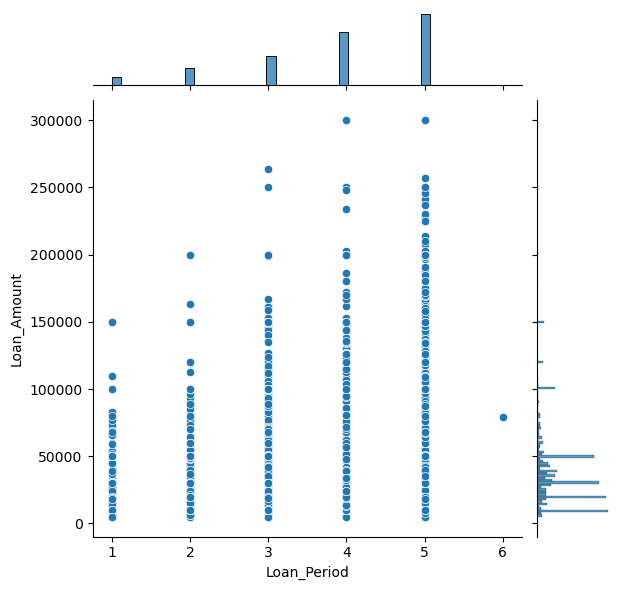

In [15]:
sns.jointplot(data = loan,y = loan.Loan_Amount,x = loan.Loan_Period)
plt.show()

#### 3. As we can see in the below graph , higher the amount of loan , lower will be the interest rates suggesting that higher the amount of loan , lower but more consistent the ROI on them (investment being the advancement of loans).

In [17]:
a = pd.qcut(loan.Interest_Rate, 5 , duplicates = "drop")

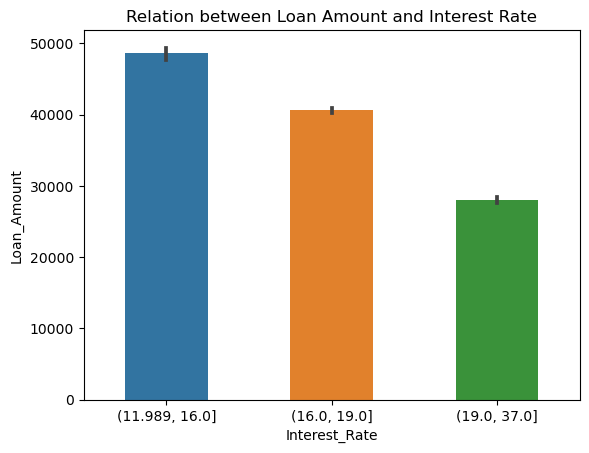

In [18]:
sns.barplot(data = loan, x = a,y = "Loan_Amount",width = 0.5)
plt.title("Relation between Loan Amount and Interest Rate")
plt.show()

#### 4 . As we can see in the graph below, as the income increases , the loan amount also increases because of the ability of the people to borrow more and pay large amount of installments.

In [19]:
loan = loan[loan["Monthly_Income"]<=10000]

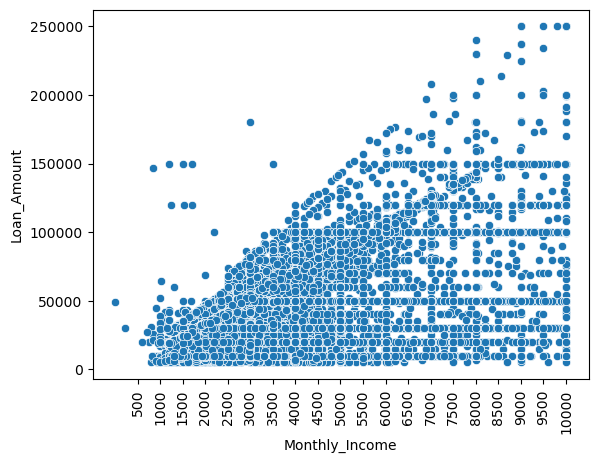

In [20]:
loan.Monthly_Income.max()
sns.scatterplot(data = loan , x = "Monthly_Income",y = "Loan_Amount")
tick_values = list(range(500,10500,500))
tick_labels = list(range(500,10500,500))
plt.xticks(tick_values, tick_labels)
plt.xticks(rotation = 90)
plt.show()